Importando Bibliotecas

In [8]:
import pandas_datareader.data as web
import datetime as dt
import time

import numpy as np
import matplotlib.mlab as m
import random as r
import matplotlib.pyplot as fig
import math 

Lendo os arquivos

In [9]:
#Pega os ultimos 60 dias
diasPeriodo = 90

fim = dt.date.today() #Data inicio dos dados que iremos coletar
inicio = fim - dt.timedelta(days=diasPeriodo)   #Data final dos dados que iremos coletar

y = web.DataReader('^BVSP', 'yahoo', inicio, fim) #Carrega os dados em um data frame

print(y.head())

               High      Low     Open    Close    Volume  Adj Close
Date                                                               
2020-10-01  95486.0  93599.0  94604.0  95479.0   9243500    95479.0
2020-10-02  95996.0  93897.0  95475.0  94016.0   8584900    94016.0
2020-10-05  96414.0  93984.0  94019.0  96089.0   8616000    96089.0
2020-10-06  97405.0  95211.0  96091.0  95615.0  11299600    95615.0
2020-10-07  96380.0  94881.0  95616.0  95526.0   9829900    95526.0


Faz a regressão linear, e calcula o residuo

Text(0.5, 1.0, 'IBOV + Regressão ')

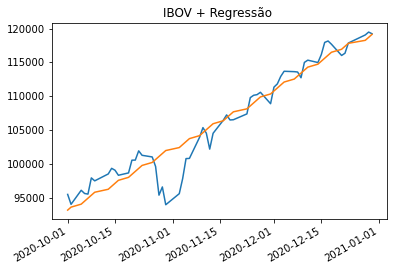

In [10]:
lin = len(y.Close) #Número de linhas
delta = m.detrend_linear(y['Close']) #Residuo
delta = abs(delta)

x = np.linspace(1, lin, lin) #Inicializa o array
coef = np.polyfit(x, y.Close, 1) #Pega os coeficientes da regressão

linhaTend = x * coef[0] + coef[1] #Cria a linha de tendência

y["Linha Tendencia"] = linhaTend


#fig.plot(linhaTend,'--k')
fig.plot(y.Close)
fig.plot(y["Linha Tendencia"])
fig.gcf().autofmt_xdate()
fig.title('IBOV + Regressão ')

Faz uma simulação de Monte Carlo

In [11]:
monteCarlo = []

reta = 0
aleat = 0
sm = 0
desvio = delta.std()

for i in range(100):
    monteCarlo.append([])

for z in range(lin):
    for i in range(100):
        reta = (z+1) * coef[0] + coef[1]
        aleat = r.random()  #Gera um valor aleatório entr 0 e 1 (Uniforme)
        sm = reta + ((-2*desvio)+(4*desvio*aleat))
        monteCarlo[i].append(sm)

Estatisticas com a simulação

In [12]:
length = len(monteCarlo)
lastDados = np.zeros(length)

for i in range(100):
    lastDados[i] = monteCarlo[i][lin-1]

Media = lastDados.mean()
Desvio = lastDados.std()

Otimista = Media + (2 * Desvio / math.sqrt(length))
Pessimista = Media - (2 * Desvio / math.sqrt(length))

print("\n\n================Estatisticas Monte Carlo================\n")
print('Média      %8.2f' % Media)
print('Desvio     %8.2f' %  Desvio)
print('Otimista   %8.2f' % Otimista)
print('Pessimista %8.2f' % Pessimista)



================Estatisticas Monte Carlo================

Média      119125.78
Desvio      1805.15
Otimista   119486.81
Pessimista 118764.75
